# Resources on Stochastic Gradient Descent

from GFG :

[Stochastic Gradient Descent:](https://www.geeksforgeeks.org/machine-learning/ml-stochastic-gradient-descent-sgd/)

And a Medium article :

[Stochastic Gradient Descent:](https://mohitmishra786687.medium.com/stochastic-gradient-descent-a-basic-explanation-cbddc63f08e0)

# Question 1


How does the learning rate affect the convergence of Stochastic Gradient Descent, and what are some common strategies for choosing or adapting the learning rate during training?


The learning rate in SGD effects it's convergence, the smaller the learning rate, the slower the convergence. Similarly, the larger the learning rate, the faster the convergence. This means, the learning rate must be optimum, not too large, not too small. If the learning rate is too large, it might skip over and never convergence, if too small it may take forever too converge.


#  Question 2

`Gradient Descent vs Stochastic Gradient Descent`

Using the same preprocessed dataset from Question 2 from assignment-2'1, do the following:

a) Train a Linear Regression model using Batch Gradient Descent (GD)

b) Train a Linear Regression model using Stochastic Gradient Descent (SGD)

c) Choose suitable values for learning rate and number of epochs.

d) Predict house prices for the test dataset using both models.

e) Evaluate both models using:
Mean Squared Error (MSE) / R² Score

f) Print the evaluation results of GD and SGD in a clear comparison format.

g) Change the learning rate and epochs of the SGD model and observe how the performance changes.

h) Explain why does the SGD path behave so erratically compared to the GD path, and despite this "noise," why might SGD be preferred for very large datasets?

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("Real estate.csv")

# Drop first column (transaction ID)
df = df.drop(df.columns[0], axis=1)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
class LinearRegressionGD:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]
        self.theta = np.zeros(X.shape[1])

        for _ in range(self.epochs):
            y_pred = X @ self.theta
            error = y_pred - y
            self.theta -= self.lr * (X.T @ error) / len(y)

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X @ self.theta

In [5]:
gd_model = LinearRegressionGD(lr=0.05, epochs=3000)
gd_model.fit(X_train, y_train)

y_pred_gd = gd_model.predict(X_test)

In [6]:
class LinearRegressionSGD:
    def __init__(self, lr=0.01, epochs=50):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]
        self.theta = np.zeros(X.shape[1])

        for _ in range(self.epochs):
            for i in range(len(y)):
                xi = X[i].reshape(1, -1)
                yi = y[i]
                y_pred = xi @ self.theta
                error = y_pred - yi
                self.theta -= self.lr * error * xi.flatten()

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X @ self.theta

In [7]:
sgd_model = LinearRegressionSGD(lr=0.01, epochs=50)
sgd_model.fit(X_train, y_train)

y_pred_sgd = sgd_model.predict(X_test)

In [8]:
mse_gd = mean_squared_error(y_test, y_pred_gd)
r2_gd = r2_score(y_test, y_pred_gd)

mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

In [9]:
results = pd.DataFrame({
    "Model": ["Batch Gradient Descent", "Stochastic Gradient Descent"],
    "Learning Rate": [0.05, 0.01],
    "Epochs": [3000, 50],
    "MSE": [mse_gd, mse_sgd],
    "R2 Score": [r2_gd, r2_sgd]
})

results

,Model,Learning Rate,Epochs,MSE,R2 Score
0,Batch Gradient Descent,0.05,3000,65.069512,0.589774
1,Stochastic Gradient Descent,0.01,50,69.022344,0.564853


In [10]:
configs = [
    (0.1, 30),
    (0.01, 50),
    (0.001, 100)
]

for lr, ep in configs:
    model = LinearRegressionSGD(lr=lr, epochs=ep)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(
        f"LR={lr}, Epochs={ep} | "
        f"MSE={mean_squared_error(y_test, preds):.2f}, "
        f"R2={r2_score(y_test, preds):.3f}"
    )

LR=0.1, Epochs=30 | MSE=266.61, R2=-0.681
LR=0.01, Epochs=50 | MSE=69.02, R2=0.565
LR=0.001, Epochs=100 | MSE=66.87, R2=0.578


SGD is prefered over GD despite the noise for large datasets, because of it's speed. SGD only needs to update the model parameters after each individual data points, not after each batch of data points. It is also more efficient in terms of memory usage.

# Question 3

## Decision Trees


### 3.1 Theoretical and Numerical Questions

a) Is a **Decision Tree** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is **entropy** in the context of decision trees?

c) What does **reduction in entropy** signify when a node is split in a decision tree?

d) You are given a dataset consisting of **10 data points**, each having:
- A class label (+ or −)
- A 2D feature vector $(x, y)$

All data points are initially present at the **root node** of a decision tree.

A **decision stump** (depth = 1 decision tree) is to be learned at the root using the **entropy reduction principle**.

**Allowed split questions:**


- ($x \le -2$?)
- ($x \le 2$?)
- ($y \le 2$?)

**Assumptions:**
- All logarithms are **base 2**


- $\log_2 3 = 1.58$
- $\log_2 5 = 2.32$

- Give answers **correct to at least 2 decimal places**

|S.No. | Class | (x, y) |
|----|-------|--------|
| 1  | − | (−3, 0) |
| 2  | + | (3, 3) |
| 3  | + | (1, 1) |
| 4  | + | (1, −1) |
| 5  | + | (−1, 1) |
| 6  | + | (−1, −1) |
| 7  | − | (1, 5) |
| 8  | − | (1, 3) |
| 9  | − | (−1, 5) |
| 10 | − | (−1, 3) |


Answer the following:
1. Compute the **entropy of the root node**
2. Compute the **entropy of the two child nodes** for each allowed split
3. Compute the **reduction in entropy** for each split
4. Identify **which split should be chosen** based on maximum entropy reduction



Decision Tree is a supervised learning algorithm as it is trained using labelled data, each training example has a corresponding target label. It learns decision rules by minimizing impurity measures.

Entropy is a measure of impurity/uncertainity in a dataset.

Reduction in entropy signifies how much uncertainity is reduced after a split. The larger the reduction, the better is the split, which measn the child node is purer compared to the parent node.

p+=5/10=0.5
p-=0.5
H root= -0.5 log2(0.5) - 0.5 log2(0.5)
H root = 1

SPLIT 1

Left Child (x<=-2)
HL=0
Right Child (x>-2)
5 positive points, 4 negative points
H R = 0.99

Weighted Entropy= 0.89
IG = 0.11

SPLIT 2

Left Child (x<=2)
5 positive points, 4 negative points
HL = 0.99

Right Child (x>-2)
HR=0

Weighted Entropy= 0.89
IG = 0.11

SPLIT 3
HL=0.72
HR=0.72
H split = 0.72

IG=0.28

Final Entropy Reduction:
x<=-2   0.11
x<=2   0.11
y<=2   0.28

y<=2 is our best split, gives max reduction in entropy

### 3.2 Coding Question (Decision Tree using Iris Dataset)

Write a Python program to **train and visualize a Decision Tree classifier** using the **Iris dataset**.

Your code should:
- Load the Iris dataset from `sklearn.datasets`
- Split the data into **70% training** and **30% testing** sets
- Train a Decision Tree classifier
- Plot the learned decision tree with appropriate **feature names** and **class labels**


In [11]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [12]:
iris = load_iris()

X = iris.data
y = iris.target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [14]:
dt_model = DecisionTreeClassifier(
    criterion="gini",    # can also use "entropy"
    random_state=42
)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

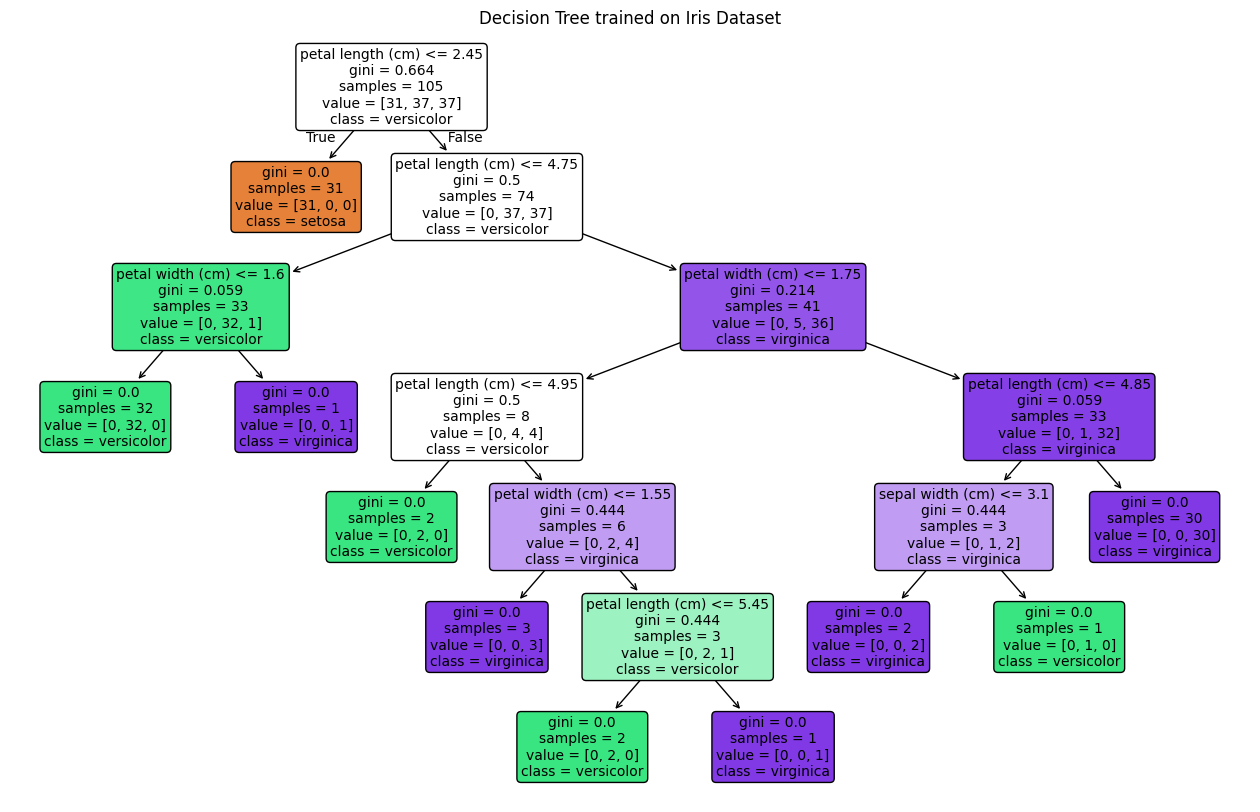

In [15]:
plt.figure(figsize=(16, 10))

plot_tree(
    dt_model,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True
)

plt.title("Decision Tree trained on Iris Dataset")
plt.show()

# Question 4

## Support Vector Machines (SVM)


### 4.1 Theoretical

a) Is a **Support Vector Machine (SVM)** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is a **margin** in SVM?  
Why does SVM aim to maximize the margin?

c) What are **support vectors**?  
Why are they important in defining the decision boundary?

d) What is the purpose of a **kernel function** in SVM?  
Name any two commonly used kernel functions.



SVM is a supervised learning algorithm, trained using labelled data. It learns a decisioon boundary that separates different classes or predicts continous values.

Margin in SVM refers to thedifference between the decison boundary (the hyperplane) and the closest data points from each class.

We aim to maximize this margin for better separation (better generalization). This reduces the risk of overfitting and makes the model more robust to noise.

Support Vectors are the data points that lie closest to the decision boundary. Removing other points doesn't affect the boundary.

Kernel allows SVM to handle non-linearly separable data by implicitly mapping data into a higher-dim space where it does become linearly separable.

Two commonly used kernel functions are: linear kernel, polynomial kernel.

### 4.2 Conceptual

a) In a linearly separable dataset, how does SVM choose the **optimal separating hyperplane**?

b) What happens when the data is **not linearly separable**?  
Briefly explain how SVM handles this situation.

c) What is the role of the **regularization parameter `C`** in SVM?  
What happens when `C` is:
- Very large  
- Very small  

In a linearly separable dataset, SVM chooses the hyperplane that maaximizes the margin, which is the distance between the hyperplane and the nearest data point from each side if the hyperplane.

When the data is not linearly separable, SVM allows some points to be misclassified using a slack varaible, this is known as soft margin SVM.

The parameter C controls the trade off bw maximizing the margin and minimizing the classification errros, a larger C allows only a small margin. While a smaller C allows a larger margin adn hence better generalisation.
